# Linear and Logistic Regression

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
import pandas as pd

### Data Pre-processing(Using Data concatenation and Datapreprocessing)

In [2]:
#Reading datafiles
human_features= pd.read_csv('HumanObserved-Dataset\HumanObserved-Features-Data\HumanObserved-Features-Data.csv')
human_same_pairs=pd.read_csv("HumanObserved-Dataset\HumanObserved-Features-Data\same_pairs.csv")
human_diff_pairs=pd.read_csv("HumanObserved-Dataset\HumanObserved-Features-Data\diffn_pairs.csv")
gsc_features= pd.read_csv('GSC-Dataset\GSC-Features-Data\GSC-Features.csv')
gsc_same_pairs=pd.read_csv("GSC-Dataset\GSC-Features-Data\same_pairs.csv")
gsc_diff_pairs=pd.read_csv("GSC-Dataset\GSC-Features-Data\diffn_pairs.csv")

In [3]:
#Generating Human concatenate dataset
human_con_A=human_same_pairs[["img_id_A","img_id_B"]].copy()
human_con_A=pd.merge(human_con_A,human_features.iloc[:,1:], how='inner', left_on='img_id_A', right_on='img_id').drop(['img_id'],axis=1)
human_con_A=pd.merge(human_con_A,human_features.iloc[:,1:], how='inner', left_on='img_id_B', right_on='img_id',suffixes=('_A','_B')).drop(['img_id'],axis=1)
human_con_A=pd.merge(human_con_A, human_same_pairs,  how='inner', left_on=['img_id_A','img_id_B'], right_on = ['img_id_A','img_id_B'])
human_con_B=human_diff_pairs[["img_id_A","img_id_B"]].iloc[0:790,:].copy()
human_con_B=pd.merge(human_con_B,human_features.iloc[:,1:], how='inner', left_on='img_id_A', right_on='img_id').drop(['img_id'],axis=1)
human_con_B=pd.merge(human_con_B,human_features.iloc[:,1:], how='inner', left_on='img_id_B', right_on='img_id',suffixes=('_A','_B')).drop(['img_id'],axis=1)
human_con_B=pd.merge(human_con_B, human_diff_pairs,  how='inner', left_on=['img_id_A','img_id_B'], right_on = ['img_id_A','img_id_B'])
human_concate=human_con_A.append(human_con_B, ignore_index=True)
human_concate=human_concate.reindex(np.random.permutation(human_concate.index))
#human_concate.to_csv("human_concate.csv",index=False)
human_concate.iloc[:,2:-1].to_csv("human_concate_X.csv",index=False,header=None)
human_concate.iloc[:,-1:].to_csv("human_concate_t.csv",index=False,header=None)

In [4]:
#Generating gsc concatenate dataset
gsc_con_A=gsc_same_pairs[["img_id_A","img_id_B"]].iloc[0:1500,:].copy()
gsc_con_A=pd.merge(gsc_con_A,gsc_features, how='inner', left_on='img_id_A', right_on='img_id').drop(['img_id'],axis=1)
gsc_con_A=pd.merge(gsc_con_A,gsc_features, how='inner', left_on='img_id_B', right_on='img_id',suffixes=('_A','_B')).drop(['img_id'],axis=1)
gsc_con_A=pd.merge(gsc_con_A,gsc_same_pairs,how='inner',left_on=['img_id_A','img_id_B'],right_on=['img_id_A','img_id_B'])
gsc_con_B=gsc_diff_pairs[["img_id_A","img_id_B"]].iloc[0:1500,:].copy()
gsc_con_B=pd.merge(gsc_con_B,gsc_features, how='inner', left_on='img_id_A', right_on='img_id').drop(['img_id'],axis=1)
gsc_con_B=pd.merge(gsc_con_B,gsc_features, how='inner', left_on='img_id_B', right_on='img_id',suffixes=('_A','_B')).drop(['img_id'],axis=1)
gsc_con_B=pd.merge(gsc_con_B,gsc_diff_pairs,how='inner',left_on=['img_id_A','img_id_B'],right_on=['img_id_A','img_id_B'])
gsc_concate=gsc_con_A.append(gsc_con_B, ignore_index=True)
gsc_concate=gsc_concate.reindex(np.random.permutation(gsc_concate.index))
#gsc_concate.to_csv("gsc_concate.csv",index=False)
gsc_concate.iloc[:,2:-1].to_csv("gsc_concate_X.csv",index=False,header=None)
gsc_concate.iloc[:,-1:].to_csv("gsc_concate_t.csv",index=False,header=None)

In [5]:
#Generating human subtraction dataset
fA=human_concate.iloc[:,2:11]
fB=human_concate.iloc[:,11:20]
fAfB=abs(fA-fB.values)
fAfB.columns = pd.Index(map(lambda x : str(x)[:-2], fAfB.columns))
human_sub=pd.concat([human_concate[["img_id_A","img_id_B"]].copy(),fAfB,human_concate.iloc[:,-1:]],axis=1)
human_sub=human_sub.reindex(np.random.permutation(human_sub.index))
#human_sub.to_csv("human_sub.csv",index=False,header=None)
human_sub.iloc[:,2:-1].to_csv("human_sub_X.csv",index=False,header=None)
human_sub.iloc[:,-1:].to_csv("human_sub_t.csv",index=False,header=None)

In [6]:
#Generating gsc subtraction dataset
fA=gsc_concate.iloc[:,2:514]
fB=gsc_concate.iloc[:,514:-1]
fAfB=abs(fA-fB.values)
fAfB.columns = pd.Index(map(lambda x : str(x)[:-2], fAfB.columns))
gsc_sub=pd.concat([gsc_concate[["img_id_A","img_id_B"]].copy(),fAfB,gsc_concate.iloc[:,-1:]],axis=1)
gsc_sub=gsc_sub.reindex(np.random.permutation(gsc_sub.index))
#gsc_sub.to_csv("gsc_sub.csv",index=False,header=None)
gsc_sub.iloc[:,2:-1].to_csv("gsc_sub_X.csv",index=False,header=None)
gsc_sub.iloc[:,-1:].to_csv("gsc_sub_t.csv",index=False,header=None)

In [7]:
training_dataset=["human_concate_X.csv","human_sub_X.csv","gsc_concate_X.csv","gsc_sub_X.csv"]
test_dataset=["human_concate_t.csv","human_sub_t.csv","gsc_concate_t.csv","gsc_sub_t.csv"]

### Linear Regression for all the four dataset

----------Linear Regression--------------------
----------Gradient Descent Solution human_concate_X.csv  and  human_concate_t.csv --------------------

eta= 0.01
E_rms Training   = 0.39071
E_rms Validation = 0.3752
E_rms Testing    = 0.30614


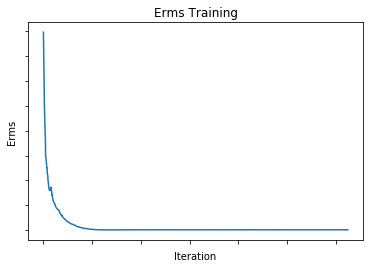

C:\Users\sassi\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


----------Linear Regression--------------------
----------Gradient Descent Solution human_sub_X.csv  and  human_sub_t.csv --------------------

eta= 0.01
E_rms Training   = 0.43551
E_rms Validation = 0.43411
E_rms Testing    = 0.43558


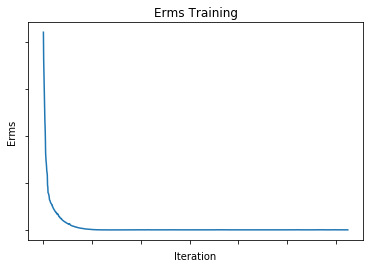

----------Linear Regression--------------------
----------Gradient Descent Solution gsc_concate_X.csv  and  gsc_concate_t.csv --------------------

eta= 0.01
E_rms Training   = 0.33748
E_rms Validation = 0.31473
E_rms Testing    = 0.32808


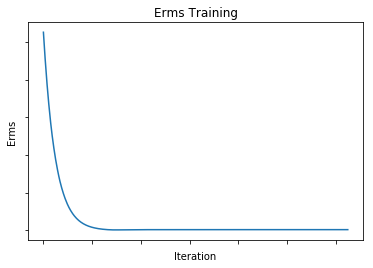

----------Linear Regression--------------------
----------Gradient Descent Solution gsc_sub_X.csv  and  gsc_sub_t.csv --------------------

eta= 0.01
E_rms Training   = 0.38445
E_rms Validation = 0.40764
E_rms Testing    = 0.36086


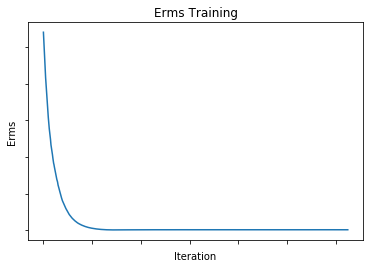

In [8]:
for data,target in zip(training_dataset,test_dataset):
    maxAcc = 0.0
    maxIter = 0
    C_Lambda = 0.5
    TrainingPercent = 80
    ValidationPercent = 10
    TestPercent = 10
    M = 10
    PHI = []
    IsSynthetic = False

    def GetTargetVector(filePath):
        t = []
        with open(filePath, 'r') as f:
            reader = csv.reader(f)
            for row in reader:  
                t.append(int(row[0]))
        return t

    def GenerateRawData(filePath, IsSynthetic):    
        dataMatrix = [] 
        with open(filePath, 'r') as fi:
            reader = csv.reader(fi)
            for row in reader:
                dataRow = []
                for column in row:
                    dataRow.append(float(column))
                dataMatrix.append(dataRow)   

        if IsSynthetic == False :
            dataMatrix = np.delete(dataMatrix, [5,6,7,8,9], axis=1)
        dataMatrix = np.transpose(dataMatrix)     
        return dataMatrix

    def GenerateTrainingTarget(rawTraining,TrainingPercent = 80):
        TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
        t           = rawTraining[:TrainingLen]
        return t

    def GenerateTrainingDataMatrix(rawData, TrainingPercent = 80):
        T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
        d2 = rawData[:,0:T_len]
        return d2

    def GenerateValData(rawData, ValPercent, TrainingCount): 
        valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
        V_End = TrainingCount + valSize
        dataMatrix = rawData[:,TrainingCount+1:V_End]
        #print (str(ValPercent) + "% Val Data Generated..")  
        return dataMatrix

    def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
        valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
        V_End = TrainingCount + valSize
        t =rawData[TrainingCount+1:V_End]
        return t

    def GenerateBigSigma(Data, MuMatrix,TrainingPercent,IsSynthetic):
        BigSigma    = np.zeros((len(Data),len(Data)))
        DataT       = np.transpose(Data)
        TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
        varVect     = []
        for i in range(0,len(DataT[0])):
            vct = []
            for j in range(0,int(TrainingLen)):
                vct.append(Data[i][j])    
            varVect.append(np.var(vct))

        for j in range(len(Data)):
            BigSigma[j][j] = varVect[j]
        if IsSynthetic == True:
            BigSigma = np.dot(3,BigSigma)
        else:
            BigSigma = np.dot(200,BigSigma)
        return BigSigma

    def GetScalar(DataRow,MuRow, BigSigInv):  
        R = np.subtract(DataRow,MuRow)
        T = np.dot(BigSigInv,np.transpose(R))  
        L = np.dot(R,T)
        return L

    def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
        phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
        return phi_x

    def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
        DataT = np.transpose(Data)
        TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
        PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
        BigSigInv = np.linalg.pinv(BigSigma)
        for  C in range(0,len(MuMatrix)):
            for R in range(0,int(TrainingLen)):
                PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
        return PHI

    def GetWeightsClosedForm(PHI, T, Lambda):
        Lambda_I = np.identity(len(PHI[0]))
        for i in range(0,len(PHI[0])):
            Lambda_I[i][i] = Lambda
        PHI_T       = np.transpose(PHI)
        PHI_SQR     = np.dot(PHI_T,PHI)
        PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
        PHI_SQR_INV = np.linalg.pinv(PHI_SQR_LI)
        INTER       = np.dot(PHI_SQR_INV, PHI_T)
        W           = np.dot(INTER, T)
        return W


    def GetValTest(VAL_PHI,W):
        Y = np.dot(W,np.transpose(VAL_PHI))
        return Y

    def GetErms(VAL_TEST_OUT,ValDataAct):
        sum = 0.0
        t=0
        accuracy = 0.0
        counter = 0
        val = 0.0
        for i in range (0,len(VAL_TEST_OUT)):
            sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
            if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
                counter+=1
        accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
        return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))


    RawTarget = GetTargetVector(target)
    RawData   = GenerateRawData(data,IsSynthetic)
    
    # Preparing Training Data
    TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
    TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)


    # Preparing Validation Data
    ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
    ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))


    # Preparing Test Data
    TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
    TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))


    #Closed Form Solution
    ErmsArr = []
    AccuracyArr = []

    kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingData))
    Mu = kmeans.cluster_centers_

    BigSigma     = GenerateBigSigma(RawData, Mu, TrainingPercent,IsSynthetic)
    TRAINING_PHI = GetPhiMatrix(RawData, Mu, BigSigma, TrainingPercent)
    W            = GetWeightsClosedForm(TRAINING_PHI,TrainingTarget,(C_Lambda)) 
    TEST_PHI     = GetPhiMatrix(TestData, Mu, BigSigma, 100) 
    VAL_PHI      = GetPhiMatrix(ValData, Mu, BigSigma, 100)


    # Finding Erms on training, validation and test set 
    TR_TEST_OUT  = GetValTest(TRAINING_PHI,W)
    VAL_TEST_OUT = GetValTest(VAL_PHI,W)
    TEST_OUT     = GetValTest(TEST_PHI,W)

    TrainingAccuracy   = str(GetErms(TR_TEST_OUT,TrainingTarget))
    ValidationAccuracy = str(GetErms(VAL_TEST_OUT,ValDataAct))
    TestAccuracy       = str(GetErms(TEST_OUT,TestDataAct))

    # Gradient Descent solution for Linear Regression
    W_Now        = np.dot(450, W)
    La           = 2
    learningRate = 0.01
    L_Erms_Val   = []
    L_Erms_TR    = []
    L_Erms_Test  = []
    W_Mat        = []
    iteration    =[]
    for i in range(0,1250):
        iteration.append(i)
        #print ('---------Iteration: ' + str(i) + '--------------')
        Delta_E_D     = -np.dot((TrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
        La_Delta_E_W  = np.dot(La,W_Now)
        Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
        Delta_W       = -np.dot(learningRate,Delta_E)
        W_T_Next      = W_Now + Delta_W
        W_Now         = W_T_Next

        #-----------------TrainingData Accuracy---------------------#
        TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
        Erms_TR       = GetErms(TR_TEST_OUT,TrainingTarget)
        L_Erms_TR.append(float(Erms_TR.split(',')[1]))

        #-----------------ValidationData Accuracy---------------------#
        VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
        Erms_Val      = GetErms(VAL_TEST_OUT,ValDataAct)
        L_Erms_Val.append(float(Erms_Val.split(',')[1]))

        #-----------------TestingData Accuracy---------------------#
        TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
        Erms_Test = GetErms(TEST_OUT,TestDataAct)
        L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    print ('----------Linear Regression--------------------')
    print ('----------Gradient Descent Solution',data,' and ',target,'--------------------')
    print ("\neta=",learningRate)
    print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
    print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
    print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))
    fig,ax = plt.subplots(1)

    
    ax.plot(iteration,L_Erms_TR)
    ax.set_ylabel('Erms')
    ax.set_xlabel('Iteration')

   
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title("Erms Training")
    
    plt.show()

### Logistic Regression for all the four data set

----------Logistic Regression--------------------
----------Gradient Descent Solution human_concate_X.csv  and  human_concate_t.csv --------------------

eta= 0.01
E_rms Training   = 0.53176
E_rms Validation = 0.50591
E_rms Testing    = 0.43305


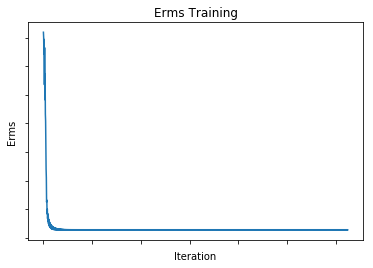

C:\Users\sassi\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


----------Logistic Regression--------------------
----------Gradient Descent Solution human_sub_X.csv  and  human_sub_t.csv --------------------

eta= 0.01
E_rms Training   = 0.52673
E_rms Validation = 0.51538
E_rms Testing    = 0.54347


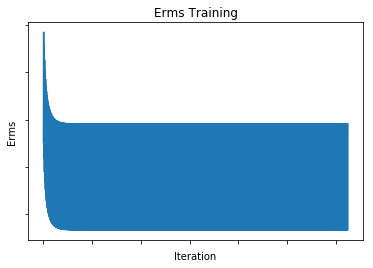

----------Logistic Regression--------------------
----------Gradient Descent Solution gsc_concate_X.csv  and  gsc_concate_t.csv --------------------

eta= 0.01
E_rms Training   = 0.23119
E_rms Validation = 0.23664
E_rms Testing    = 0.23373


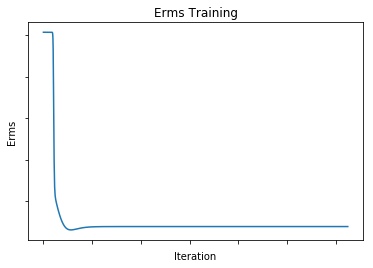

----------Logistic Regression--------------------
----------Gradient Descent Solution gsc_sub_X.csv  and  gsc_sub_t.csv --------------------

eta= 0.01
E_rms Training   = 0.35892
E_rms Validation = 0.36613
E_rms Testing    = 0.35164


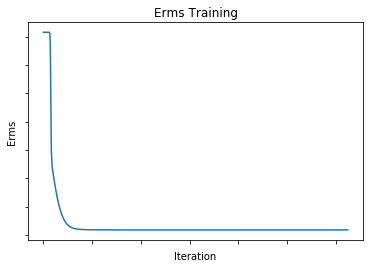

In [9]:
for data,target in zip(training_dataset,test_dataset):
    maxAcc = 0.0
    maxIter = 0
    C_Lambda = 0.5
    TrainingPercent = 80
    ValidationPercent = 10
    TestPercent = 10
    M = 10
    PHI = []
    IsSynthetic = False

    def GetTargetVector(filePath):
        t = []
        with open(filePath, 'r') as f:
            reader = csv.reader(f)
            for row in reader:  
                t.append(int(row[0]))
        #print("Raw Training Generated..")
        return t

    def GenerateRawData(filePath, IsSynthetic):    
        dataMatrix = [] 
        with open(filePath, 'r') as fi:
            reader = csv.reader(fi)
            for row in reader:
                dataRow = []
                for column in row:
                    dataRow.append(float(column))
                dataMatrix.append(dataRow)   

        if IsSynthetic == False :
            dataMatrix = np.delete(dataMatrix, [5,6,7,8,9], axis=1)
        dataMatrix = np.transpose(dataMatrix)     
        return dataMatrix

    def GenerateTrainingTarget(rawTraining,TrainingPercent = 80):
        TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
        t           = rawTraining[:TrainingLen]
        return t

    def GenerateTrainingDataMatrix(rawData, TrainingPercent = 80):
        T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
        d2 = rawData[:,0:T_len]
        return d2

    def GenerateValData(rawData, ValPercent, TrainingCount): 
        valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
        V_End = TrainingCount + valSize
        dataMatrix = rawData[:,TrainingCount+1:V_End]
        return dataMatrix

    def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
        valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
        V_End = TrainingCount + valSize
        t =rawData[TrainingCount+1:V_End]
        return t

    def GenerateBigSigma(Data, MuMatrix,TrainingPercent,IsSynthetic):
        BigSigma    = np.zeros((len(Data),len(Data)))
        DataT       = np.transpose(Data)
        TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
        varVect     = []
        for i in range(0,len(DataT[0])):
            vct = []
            for j in range(0,int(TrainingLen)):
                vct.append(Data[i][j])    
            varVect.append(np.var(vct))

        for j in range(len(Data)):
            BigSigma[j][j] = varVect[j]
        if IsSynthetic == True:
            BigSigma = np.dot(3,BigSigma)
        else:
            BigSigma = np.dot(200,BigSigma)
        return BigSigma

    def GetScalar(DataRow,MuRow, BigSigInv):  
        R = np.subtract(DataRow,MuRow)
        T = np.dot(BigSigInv,np.transpose(R))  
        L = np.dot(R,T)
        return L

    def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
        phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
        return phi_x

    def GetValTest(VAL_PHI,W):
        Y = np.dot(W,np.transpose(VAL_PHI))
        return Y

    def GetErms(VAL_TEST_OUT,ValDataAct):
        sum = 0.0
        t=0
        accuracy = 0.0
        counter = 0
        val = 0.0
        for i in range (0,len(VAL_TEST_OUT)):
            sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
            if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
                counter+=1
        accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
        return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))


    RawTarget = GetTargetVector(target)
    RawData   = GenerateRawData(data,IsSynthetic)
    
    # Preparing Training Data
    TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
    TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)

    # Preparing Validation Data
    ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
    ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))

    # Preparing Test Data
    TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
    TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))

    
    # Gradient Descent solution for Logistic Regression
    W_Now=np.random.rand(TrainingData.shape[0])
    La           = 2
    learningRate = 0.01
    L_Erms_Val   = []
    L_Erms_TR    = []
    L_Erms_Test  = []
    W_Mat        = []

    def sigmoid(W, X):
        return 1.0/(1+np.exp(-np.dot(X,np.transpose(W))))

    for i in range(0,1250):

        #print ('---------Iteration: ' + str(i) + '--------------')
        sig           = sigmoid(W_Now, np.transpose(TrainingData))
        sub           = np.subtract(sig,TrainingTarget)
        Delta_E_D     = np.dot(TrainingData, sub)/TrainingData.shape[0]
        La_Delta_E_W  = np.dot(La,W_Now)
        Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
        Delta_W       = -np.dot(learningRate,Delta_E)
        W_T_Next      = W_Now + Delta_W
        W_Now         = W_T_Next

        #-----------------TrainingData Accuracy---------------------#
        TR_TEST_OUT   = sigmoid(W_T_Next,np.transpose(TrainingData))
        Erms_TR       = GetErms(TR_TEST_OUT,TrainingTarget)
        L_Erms_TR.append(float(Erms_TR.split(',')[1]))

        #-----------------ValidationData Accuracy---------------------#
        VAL_TEST_OUT  = sigmoid(W_T_Next,np.transpose(ValData))
        Erms_Val      = GetErms(VAL_TEST_OUT,ValDataAct)
        L_Erms_Val.append(float(Erms_Val.split(',')[1]))

        #-----------------TestingData Accuracy---------------------#
        TEST_OUT      = sigmoid(W_T_Next,np.transpose(TestData))
        Erms_Test = GetErms(TEST_OUT,TestDataAct)
        L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    print ('----------Logistic Regression--------------------')
    print ('----------Gradient Descent Solution',data,' and ',target,'--------------------')
    print ("\neta=",learningRate)
    print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
    print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
    print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))
    fig,ax = plt.subplots(1)

    ax.plot(iteration,L_Erms_TR)
    ax.set_ylabel('Erms')
    ax.set_xlabel('Iteration')


    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title("Erms Training")
   
    plt.show()